# SVM

In [67]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns

import pandas as pd
import numpy as np

import sys
sys.path.append('..')

from util.helpers import id2label, labels

In [68]:
df = pd.read_csv('../../dataset/LDA_Arguments.csv')


In [69]:
df["label"].unique()

array([0, 2, 1, 4, 5, 3, 6], dtype=int64)

In [70]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [71]:
vector = TfidfVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

In [73]:
# SVM
svm = SVC(C = 1, gamma="scale", kernel="linear", random_state=42)



In [74]:
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [75]:
y_pred = svm.predict(X_test)

y_pred = np.array(y_pred)
y_pred = y_pred.reshape(-1, 1)
print(accuracy_score(y_test, y_pred))

0.5336538461538461


                        precision    recall  f1-score   support

       Interessegruppe       0.00      0.00      0.00         2
 Offentlig forvaltning       0.62      0.20      0.30        40
               Bedrift       0.00      0.00      0.00        11
          Privatperson       0.43      0.92      0.58        64
        Politisk parti       0.81      0.53      0.64        64
Frivillig organisasjon       0.00      0.00      0.00         5
 Akademisk institusjon       0.67      0.45      0.54        22

              accuracy                           0.53       208
             macro avg       0.36      0.30      0.30       208
          weighted avg       0.57      0.53      0.49       208



c:\Users\henriklarsen\anaconda3\envs\TDT4310\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\henriklarsen\anaconda3\envs\TDT4310\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\henriklarsen\anaconda3\envs\TDT4310\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

<Axes: >

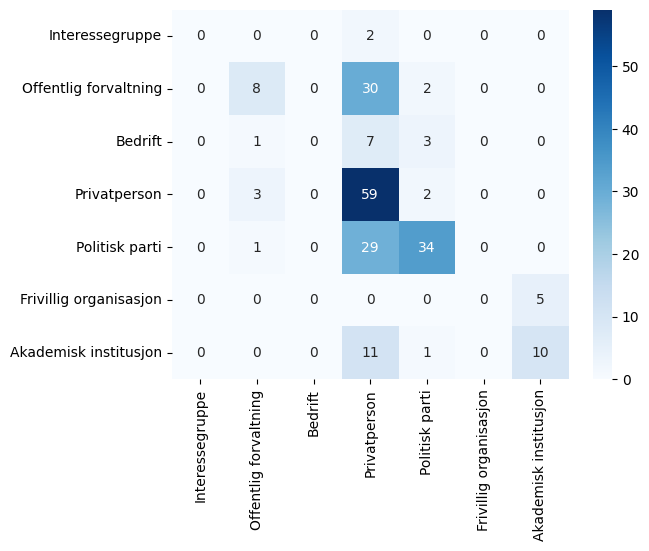

In [76]:



y_test = [id2label(y) for y in y_test]
# Flatten list
y_pred = y_pred.flatten()

y_pred = [id2label(y) for y in y_pred]

label = labels()

#Classification report
print(classification_report(y_test, y_pred, target_names=label))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)

## SVM with count vectorizer

In [77]:
vector = CountVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# SVM
svm = SVC(kernel="linear", C=0.1, gamma="scale", random_state=42)

"""grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)"""


'grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1, verbose=2)\n\ngrid_search.fit(X_train, y_train)\n\nprint(grid_search.best_params_)'

In [79]:
svm.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', random_state=42)

In [80]:
y_pred = svm.predict(X_test)

y_pred = np.array(y_pred)
y_pred = y_pred.reshape(-1, 1)
print(accuracy_score(y_test, y_pred))

0.5288461538461539


                        precision    recall  f1-score   support

       Interessegruppe       1.00      0.50      0.67         2
 Offentlig forvaltning       0.39      0.35      0.37        40
               Bedrift       0.50      0.18      0.27        11
          Privatperson       0.45      0.67      0.54        64
        Politisk parti       0.68      0.61      0.64        64
Frivillig organisasjon       1.00      0.20      0.33         5
 Akademisk institusjon       0.71      0.45      0.56        22

              accuracy                           0.53       208
             macro avg       0.68      0.42      0.48       208
          weighted avg       0.56      0.53      0.52       208



<Axes: >

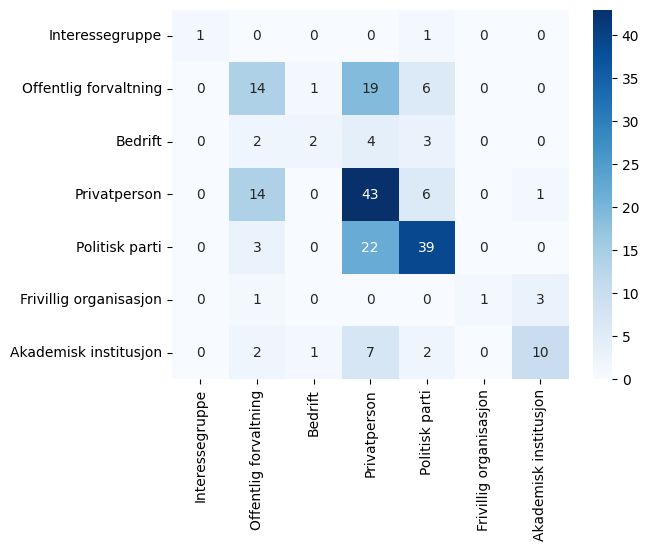

In [81]:
# Convert ids to labels

y_test = [id2label(y) for y in y_test]
# Flatten list
y_pred = y_pred.flatten()

y_pred = [id2label(y) for y in y_pred]

label = labels()

# Classification report
print(classification_report(y_test, y_pred, target_names=label))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)

## SVM with word2vec

In [82]:
import spacy
from gensim.models import Word2Vec
from gensim.models import Doc2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [83]:
nlp = spacy.load('nb_core_news_md')

# Tokenize the text
def preprocess_text(text):
    
    doc = nlp(text.lower())
    tokens = [token.text for token in doc]
    return tokens

tokenized_docs = [preprocess_text(doc) for doc in df["text"]]

tagged_docs = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(tokenized_docs)]

model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4, epochs=40)
model.build_vocab(tagged_docs)
model.train(tagged_docs, total_examples=model.corpus_count, epochs=model.epochs)

In [84]:
doc_vectors = [model.infer_vector(doc) for doc in tokenized_docs]

In [85]:


from math import isnan


X = np.array(doc_vectors)
y = df["label"].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# SVM model

svm = SVC(kernel="linear", C=1, random_state=42)

svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [87]:
y_pred = svm.predict(X_test)

y_pred = np.array(y_pred)
y_pred = y_pred.reshape(-1, 1)
print(accuracy_score(y_test, y_pred))

0.4519230769230769


In [88]:
# Convert ids to labels
def ids_to_labels(y, id2label):

    labels = [id2label[i] for i in np.array(y)]

    return labels

y_test = ids_to_labels(y_test, id2label)
# Flatten list
y_pred = y_pred.flatten()

y_pred = ids_to_labels(y_pred, id2label)

labels = list(id2label.values())

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)

TypeError: 'function' object is not subscriptable